In [2]:
import sys
ga_path = '/Users/pdcos/Documents/Estudos/Mestrado/Tese/Algoritmos Evolutivos/evolutionary_algorithms/src'
sys.path.append(ga_path)
from models.pso import PSO

In [1]:
import numpy as np
from model.build_rocket import RocketModel
import math
import sys
import os
import sys, os
import warnings
import contextlib
import io
import re

import builtins
import concurrent.futures


In [3]:

params_list = [11.5 * 1e6, 2.9, 0.23125, 190, 
                11.5 * 1e6, 2.9, 0.23125, 190,
                2,
                2.6]
bounds = [[1e6, 30e6], [1, 9], [0.05, 0.6], [2, 200],
          [1e6, 30e6], [1, 9], [0.05, 0.6], [2, 200],
          [1, 10],
          [1, 10]
 ]

bounds_norm = [[0, 1], [0, 1], [0, 1], [0, 1],
          [0, 1], [0, 1], [0, 1], [0, 1],
          [0, 1],
          [0, 1]
 ]

def normalize(parameters_list, bounds):
    normalized_list = []
    for param, bound in zip(params_list, bounds):
        lower_bound = bound[0]
        upper_bound = bound[1]
        norm_param = (param - lower_bound) / (upper_bound - lower_bound)
        normalized_list.append(norm_param)
    return normalized_list

def denormalize(norm_params_list, bounds):
    denormalized_list = []
    for norm_param, bound in zip(norm_params_list, bounds):
        lower_bound = bound[0]
        upper_bound = bound[1]
        denorm_param = (norm_param * (upper_bound - lower_bound)) + lower_bound
        denormalized_list.append(denorm_param)
    return denormalized_list

def fitness_func(parameters_list):
    #parameters_list = denormalize(parameters_list, bounds)
    engineParams = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[0],
                    "MR": parameters_list[1],
                    "nozzleDiam": parameters_list[2],
                    "eps": parameters_list[3]}

    engineParamsFirst = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[4],
                    "MR": parameters_list[5],
                    "nozzleDiam": parameters_list[6],
                    "eps": parameters_list[7]}

    upperStageStructureParams = {"oxName": "LOX",
                                 "fuelName": "RP1",
                                 "MR": parameters_list[1],
                                 "tankPressure": 0.1,
                                 "radius": parameters_list[8],
                                } # 0 porque ainda nao temos esse valor
    firstStageStructureParams = {"oxName": "LOX",
                                "fuelName": "RP1",
                                "MR": parameters_list[5],
                                "tankPressure": 0.1,
                                "radius": parameters_list[9],
                            } # 0 porque ainda nao temos esse valor
    payloadBayParams = {"payloadHeight": 6.7,
                    "payloadRadius": 4.6/2,
                    "payloadMass": 7500,
                    "lowerStageRadius": parameters_list[8],
                    "lowerRocketSurfaceArea": 0} # 0 porque ainda nao temos esse valor

    rocket_model = RocketModel(upperEngineParams=engineParams,
                               firstEngineParams=engineParamsFirst,
                               payloadBayParams=payloadBayParams,
                               upperStageStructureParams=upperStageStructureParams,
                               firstStageStructureParams = firstStageStructureParams,
                               deltaV_upperStage=8500,
                               deltaV_landing=2000,
                               deltaV_firstStage=3500,
                               nEnginesUpperStage=1,
                               nEnignesFirstStage=10)

    try:
        rocket_model.build_all()
        glow = rocket_model.glow

    except:
        return 0
    #enablePrint()

    #print(rocket_model.upperStageEngine.thrustVac)
    #print(rocket_model.m_0_2)

    if math.isnan(glow):
        return 0
    if math.isnan(rocket_model.m_0_1):
        return 0
    if math.isnan(rocket_model.m_0_2):
        return 0
    if rocket_model.m_0_1 <= 0:
        return 0
    if rocket_model.m_0_2 <= 0:
        return 0
    if rocket_model.m_p_1 <= 0:
        return 0
    if rocket_model.m_p_2 <= 0:
        return 0
    if rocket_model.upperStageStructure.oxTankCylHeight < 0:
        return 0
    if rocket_model.upperStageStructure.fuelTankCylHeight < 0:
        return 0
    if rocket_model.firstStageStructure.oxTankCylHeight < 0:
        return 0
    if rocket_model.firstStageStructure.fuelTankCylHeight  < 0:
        return 0
    if rocket_model.upperStageEngine.thrustVac * 1<= 0.8 * rocket_model.m_0_2 * 9.81:
        return 0
    if rocket_model.firstStageEngine.thrustSea * 10 <= 1.3 * rocket_model.glow * 9.81: # Multiplicar pelo número de motores (9)
        return 0

    #print(rocket_model.glow * 9.81 * 1.3)
    #print(rocket_model.firstStageEngine.thrustSea * 10)

    #print(0.8 * rocket_model.m_0_2 * 9.81)
    #print(rocket_model.upperStageEngine.thrustVac * 1)

    #glow = glow / 100000
    #fitness = (1.0/glow) * 100000
    fitness =  (1.0/glow) * 100000
    return fitness

# norm = normalize(params_list, bounds)
# fitness_func(norm, 0)
# norm = normalize(params_list, bounds)
# denorm = denormalize(norm, bounds)


In [5]:
bounds = np.array([[1e6, 30e6], [1, 9], [0.05, 0.6], [2, 200],
          [1e6, 30e6], [1, 9], [0.05, 0.6], [2, 200],
          [1, 10],
          [1, 10]
 ])
min_mat = bounds.T[0, :]
max_mat = bounds.T[1,:]

pop_size = 20
x_i = np.random.rand(pop_size, 10)
denorm = x_i * (max_mat - min_mat) + min_mat
#denorm
#denorm = denormalize(x_i, bounds)
#print(denorm)


In [6]:
import time
bounds = np.array([[1e6, 30e6], [1, 9], [0.05, 0.6], [2, 200],
          [1e6, 30e6], [1, 9], [0.05, 0.6], [2, 200],
          [1, 10],
          [1, 10]
 ])
def fitness_func_mult(params_array):
    min_mat = bounds.T[0, :]
    max_mat = bounds.T[1,:]
    pop = params_array * (max_mat - min_mat) + min_mat
    num_workers = 8
    #results = fitness_func(pop[2])
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
        futures = [executor.submit(fitness_func, x) for x in pop]
        #for result in executor.map(fitness_func, pop):
            # retrieve the result

        results = np.array([future.result() for future in concurrent.futures.as_completed(futures)])
        return results
    
    
if __name__ == "__main__":
    fitness_func_mult(x_i)

/Users/pdcos/Documents/Estudos/Mestrado/Tese/Implementação da Tese do Jentzsch/rocket_optimization_implementation/model/structure/stage_structure.py:227: RuntimeWarning: invalid value encountered in double_scalars
  mass = 4.95 * (area ** 1.15)


  0%|          | 1/200 [00:01<06:18,  1.90s/it]/Users/pdcos/Documents/Estudos/Mestrado/Tese/Implementação da Tese do Jentzsch/rocket_optimization_implementation/model/build_rocket.py:115: RuntimeWarning: invalid value encountered in double_scalars
  m_s_1 = m_s_1_num / m_s_1_den * self.m_0_2


=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -2.1723319655144335   actual= 1.0000000000000009 )
 input gam= 0.9262177830578094  eps= -2.1723319655144335
=================  WARNING  ==========================
=================  WARNING  ==========================
=================  WARNING  ========================== Bad Solution in CalcPCoPE=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio==================  WARNING  ========================== 

 Bad Solution in CalcPCoPE
 (desired Area Ratio= 31.533519012081477   actual= inf )
 input gam=-11.075200325392357   actual= 1.0 )
 
 input gam= (desired Area Ratio=0.0 -18.7471467315922   actual= 0.9999999999999967 1.1190129736308472  eps=  Bad Solution in CalcPCoPE )
 input gam=-11.075200325392357
=================  WARNING  ==========================

 (desired Area Ratio= -19.16616552556617   actual= 1.0000000000000002 )
 input ga

/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/rocketcea/Isp.py:50: RuntimeWarning: divide by zero encountered in double_scalars
  p1=PCoPE**(-1.0/gam)
/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/rocketcea/Isp.py:52: RuntimeWarning: divide by zero encountered in double_scalars
  p2=1.0-PCoPE**(-(gam-1.0)/gam)
/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/rocketcea/Isp.py:54: RuntimeWarning: invalid value encountered in double_scalars
  eps=1.0/(g1*p1*(g2*p2)**0.5)


=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -22.691430411132128   actual= 1.0000000000000004 )
 input gam= 1.0074801209413242  eps= -22.691430411132128
=================  WARNING  ==========================
=================  WARNING  ===========================================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 163.19351270747282   actual= inf )
 input gam= 0.0  eps= 163.19351270747282
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio=
  Bad Solution in CalcPCoPE
 (desired Area Ratio= -1.3500133019341836   actual= 1.0000000000000007 )
1.0=================  WARNING  ==========================   actual= inf )
 input gam= input gam=
 0.9070081758867888  eps= -1.3500133019341836
=================  WARNING  ==========================  Bad Solution in CalcPCoPE
 (desired Area

  1%|          | 2/200 [00:04<06:47,  2.06s/it]

)
 input gam= 0.0  eps= 1.0
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -7.2324844314489845   actual= 1.000000000000001 )
 input gam= 0.9307157419261863  eps= -7.2324844314489845
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= =================  WARNING  ==========================-26.961803274582476   actual= 1.0000000000000027 )
 input gam= 0.979210315333065 
=================  WARNING  ========================== eps=
 Bad Solution in CalcPCoPE Bad Solution in CalcPCoPE
 
 (desired Area Ratio= (desired Area Ratio= 54.654767214317275  -26.961803274582476-34.470682196689125
=================  WARNING  ==========================
=================  WARNING  ==========================

/Users/pdcos/Documents/Estudos/Mestrado/Tese/Implementação da Tese do Jentzsch/rocket_optimization_implementation/model/build_rocket.py:113: RuntimeWarning: divide by zero encountered in double_scalars
  m_s_1_num = 1 - (math.exp( (self.deltaV_firstStage)/ (Isp_sea *self.g0)))
/Users/pdcos/Documents/Estudos/Mestrado/Tese/Implementação da Tese do Jentzsch/rocket_optimization_implementation/model/build_rocket.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  m_s_1_den =   math.exp((self.deltaV_firstStage)/ (Isp_sea * self.g0)) - 1/coef_e1


   actual=  actual= 1.0000000000000002 inf )
 input gam= 0.0  eps= 54.654767214317275
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 )
 input gam==================  WARNING  ========================== =================  WARNING  ==========================

 (desired Area Ratio= Bad Solution in CalcPCoPE
 (desired Area Ratio= -14.025889512447648   actual=
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -35.130741288289315   actual= 1.0000000000000004 )
 input gam= 0.8897532816017895  eps= -35.130741288289315
=================  WARNING  ==========================
 1.0   actual= inf )
 input gam= 0.0  eps= 1.0
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE1.0535901301169934   eps= -34.470682196689125
0.9999999999999993 )=================  WARNING  ==========================

 input gam= 1.1120839654036903  eps= -14.025889512447648
=================  WARNING  =====

/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/rocketcea/cea_obj.py:1420: RuntimeWarning: invalid value encountered in double_scalars
  CfAmb = IspAmb * 32.174 / Cstar


 inf )
 input gam= 0.0  eps= 136.3315939171306
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 1.0 =================  WARNING  ==========================  actual= 
inf Bad Solution in CalcPCoPE
 )
 input gam= 0.0 (desired Area Ratio= -9.387471725118813   eps= 1.0
=================  WARNING  ==========================
  actual==================  WARNING  ==========================
 Bad Solution in CalcPCoPE 1.0000000000000013 
)
 input gam= 1.0880755610683874  eps= -9.387471725118813
=================  WARNING  ==========================
 (desired Area Ratio= 98.74371689633826   actual= inf=================  WARNING  ========================== 
 Bad Solution in CalcPCoPE)
 (desired Area Ratio= -24.037527139926212   actual= 
 input gam= 0.0  eps= 98.743716896338261.0000000000000002 )
 input gam= 1.1403657527520363  eps= -24.037527139926212
=================  WARNING  ===========

/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 110.17462707266   actual= inf )
 input gam= 0.0 =================  WARNING  ========================== eps=
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -13.217191572265964   actual= 1.0000000000000016 )
  input gam= =================  WARNING  ==========================110.17462707266=================  WARNING  ==========================
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio=

 1.0   actual= Bad Solution in CalcPCoPE
 (desired Area Ratio= 145.46641901411547   actual= inf  Bad Solution in CalcPCoPE1.096745645524334
  eps=  -13.217191572265964
=================  WARNING  ==========================
 (desired Area Ratio=inf)
 input gam= 0.0  eps= 145.46641901411547
=================  WARNING  ==========================
=================  WARNING  ==================

  2%|▏         | 3/200 [00:06<06:50,  2.09s/it]


 Bad Solution in CalcPCoPE
 (desired Area Ratio==================  WARNING  ========================== 1.0   actual= inf )
 input gam= 0.0  eps= 1.0
=================  WARNING  ==========================

 Bad Solution in CalcPCoPE
 (desired Area Ratio= -6.303708802610954   actual= 1.0000000000000004 )
 input gam= 1.112525037814784  eps= -6.303708802610954
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE=================  WARNING  ==========================
 (desired Area Ratio= -10.754159954354135   actual= 0.9999999999999996 )
 input gam= 0.8873003366723596  eps= -10.754159954354135

 Bad Solution in CalcPCoPE
 (desired Area Ratio= -4.813537869764686   actual= 1.0000000000000002=================  WARNING  ========================== )

 input gam= 1.1231530900335986  eps= -4.813537869764686
=================  WARNING  ==========================
=================  WARNING  =========================

  2%|▏         | 4/200 [00:08<06:58,  2.14s/it]

 0.0  eps= 162.85115543304832
=================  WARNING  ==========================
1.0
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 161.8469022255957=================  WARNING  ==========================   actual= inf )
 input gam= 0.0  eps= 161.8469022255957
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 1.0   actual= inf )
 input gam= 0.0  eps= 1.0
=================  WARNING  ==========================

=================  WARNING  ========================== Bad Solution in CalcPCoPE
 Bad Solution in CalcPCoPE
 (desired Area Ratio=
 (desired Area Ratio=  197.5765932680034   actual=38.288937191083335   actual= inf )
 input gam= 0.0  eps= 38.288937191083335
=================  WARNING  ==========================
 =================  WARNING  =======================

  2%|▎         | 5/200 [00:10<07:00,  2.16s/it]

=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -14.944737927088411   actual= 1.0000000000000002 )
 input gam= 1.10430888570273  eps= -14.944737927088411
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 0.7304575581269368=================  WARNING  ==========================   actual= 1.0000000000000004 )
 input gam= 1.1029246883067545  eps= 0.7304575581269368
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 85.09462292356099   actual= inf )
 input gam= 0.0  eps= 85.09462292356099
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
=================  WARNING  ==========================

 Bad Solution in CalcPCoPE (desired Area Ratio==================  WARNING  ==========================
=================  WARNING  =========================

  3%|▎         | 6/200 [00:12<07:01,  2.17s/it]

=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -5.20744422342512   actual= 1.0000000000000002 )
 input gam= 1.0913339177014265  eps= -5.20744422342512
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio==================  WARNING  ==========================
 82.82305544355435   actual= inf )
 input gam=  Bad Solution in CalcPCoPE
 (desired Area Ratio= -12.553852338498885   actual=0.0 1.0000000000000004 )
 input gam=   eps=0.9212621238021428  eps= -12.553852338498885
 82.82305544355435
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 1.0 =================  WARNING  ==========================
  actual= inf )
 input gam= 0.0  eps= 1.0
=================  WARNING  ==========================
=================  WARNING  ====

  6%|▌         | 12/200 [00:26<07:00,  2.24s/it]

=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -4.557325685456158   actual= 1.0000000000000007 )
 input gam= 0.8350121783805704  eps= -4.557325685456158
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -4.286744696668415   actual= 1.0000000000000002 )
 input gam= 0.9275432825634913=================  WARNING  ==========================  eps= -4.286744696668415
=================  WARNING  ==========================

 Bad Solution in CalcPCoPE
 (desired Area Ratio= -3.815916320758231   actual= 1.0000000000000018 )
 input gam= 0.9674263553861543  eps= -3.815916320758231
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -0.06966975007865095   actual= 1.0000000000000004 )
 input gam= 0.844839783038166  eps= -0.0696697500

  6%|▋         | 13/200 [00:28<06:53,  2.21s/it]

=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -9.46084858267376   actual= 1.0 )
 input gam= 0.8357380225821919  eps= -9.46084858267376
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 0.8576793765277493   actual= 1.0 )
 input gam= 0.9051864195477606  eps= 0.8576793765277493
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -9.216602814115422   actual= 1.000000000000001 )
 input gam= 0.9460138222165851  eps= -9.216602814115422
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -8.779662503966623   actual= 0.9999999999999967 )
 input gam= 0.984549283885071  eps= -8.779662503966623
=================  WARNING  =

  7%|▋         | 14/200 [00:30<06:53,  2.22s/it]

=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -9.985575137571386   actual= 1.0000000000000004 )
 input gam= 0.8396672028708857  eps= -9.985575137571386
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -9.602244759175731   actual= 1.0 )
 input gam= 0.88557345605684  eps==================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -8.954712135170853   actual= 1.0 )
 input gam= 1.0193292785139763  eps= -8.954712135170853
=================  WARNING  ==========================
 -9.602244759175731
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -4.292659646541838   actual= 1.0000000000000007 )
 input gam= 0.8846254969177795  eps= -4.292659646541838
=================  WARNING 

  8%|▊         | 15/200 [00:32<06:58,  2.26s/it]

=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -7.966793320842228   actual= 1.0000000000000002 )
 input gam= 0.854851549978989  eps= -7.966793320842228
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -7.3568801442864995   actual= 1.0 )
 input gam= 0.9623310468616253  eps= -7.3568801442864995
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -6.369655435214666   actual= 0.999999999999998 )
 input gam= 1.0500711899121844  eps= -6.369655435214666
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -0.37760161929300606   actual= 1.0 )
 input gam= 0.919335698942169  eps= -0.37760161929300606
=================  WAR

  8%|▊         | 16/200 [00:35<07:18,  2.38s/it]

=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -5.356173891396315   actual= 1.0000000000000004 )
 input gam= 0.8683571828308557  eps= -5.356173891396315
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -4.560524078253237   actual= 1.0000000000000018 )
 input gam= 0.9645641826569368 =================  WARNING  ==========================
 eps= Bad Solution in CalcPCoPE
 (desired Area Ratio= -3.2964776186316183   actual= 1.0000000000000018  -4.560524078253237
=================  WARNING  ==========================
)
 input gam= 1.0661791926168382  eps= -3.2964776186316183
=================  WARNING  ==========================


  8%|▊         | 17/200 [00:37<06:30,  2.14s/it]

=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -1.5557026962404805   actual= 1.0000000000000004 )
 input gam= 0.8973546433672145  eps= -1.5557026962404805
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= -0.6588904893989302   actual= 1.0000000000000002 )
 input gam= 0.9727991756120007  eps= -0.6588904893989302
=================  WARNING  ==========================
=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 0.7500111031068113   actual= 1.0000000000000002 )
 input gam= 1.075912322725149  eps= 0.7500111031068113
=================  WARNING  ==========================


 16%|█▌        | 32/200 [01:13<07:20,  2.62s/it]/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/rocketcea/cea_obj.py:1430: RuntimeWarning: invalid value encountered in double_scalars
  IspAmb = CfAmb * Cstar / 32.174
 19%|█▉        | 38/200 [01:26<05:50,  2.16s/it]/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/proptools/nozzle.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  return (A_t * p_c * gamma / (gamma * R_univ / m_molar * T_c)**0.5
 33%|███▎      | 66/200 [02:28<05:30,  2.47s/it]

=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 88.27093550197473   actual= inf )
 input gam= 0.0  eps= 88.27093550197473
=================  WARNING  ==========================


 96%|█████████▌| 192/200 [07:19<00:16,  2.03s/it]

=================  WARNING  ==========================
 Bad Solution in CalcPCoPE
 (desired Area Ratio= 91.63076985885388   actual= inf )
 input gam= 0.0  eps= 91.63076985885388
=================  WARNING  ==========================


100%|██████████| 200/200 [07:35<00:00,  2.28s/it]

--- 457.34115290641785 seconds ---


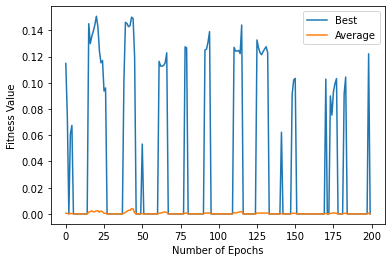

In [9]:
if __name__ == "__main__":

    pso_alg = PSO(
        num_epochs=200,
        pop_size=200,
        chrom_length=10,
        n_best=2,
        global_factor = 0.1,
        local_factor = 0.1,
        speed_factor = 0.8,
        v_max=0.2,
        value_ranges=bounds,
        fitness_func=fitness_func_mult,
        neighborhood_mode='self'

    )

    best_solutions = pso_alg.fit()
    pso_alg.plot()

In [11]:
def rocket_func(parameters_list):
    parameters_list = denormalize(parameters_list, bounds)
    engineParams = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[0],
                    "MR": parameters_list[1],
                    "nozzleDiam": parameters_list[2],
                    "eps": parameters_list[3]}

    engineParamsFirst = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[4],
                    "MR": parameters_list[5],
                    "nozzleDiam": parameters_list[6],
                    "eps": parameters_list[7]}

    upperStageStructureParams = {"oxName": "LOX",
                                 "fuelName": "RP1",
                                 "MR": parameters_list[1],
                                 "tankPressure": 0.1,
                                 "radius": parameters_list[8],
                                } # 0 porque ainda nao temos esse valor
    firstStageStructureParams = {"oxName": "LOX",
                                "fuelName": "RP1",
                                "MR": parameters_list[5],
                                "tankPressure": 0.1,
                                "radius": parameters_list[9],
                            } # 0 porque ainda nao temos esse valor
    payloadBayParams = {"payloadHeight": 6.7,
                    "payloadRadius": 4.6/2,
                    "payloadMass": 7500,
                    "lowerStageRadius": parameters_list[8],
                    "lowerRocketSurfaceArea": 0} # 0 porque ainda nao temos esse valor

    rocket_model = RocketModel(upperEngineParams=engineParams,
                               firstEngineParams=engineParamsFirst,
                               payloadBayParams=payloadBayParams,
                               upperStageStructureParams=upperStageStructureParams,
                               firstStageStructureParams = firstStageStructureParams,
                               deltaV_upperStage=8500,
                               deltaV_landing=2000,
                               deltaV_firstStage=3500,
                               nEnginesUpperStage=1,
                               nEnignesFirstStage=10)
    try:
        rocket_model.build_all()
        glow = rocket_model.glow
    except:
        glow = 1e19
    if math.isnan(glow):
        glow = 1e19
    if math.isnan(rocket_model.m_0_1):
        glow = 1e19
    if math.isnan(rocket_model.m_0_2):
        glow = 1e19
    if rocket_model.m_0_1 <= 0:
        glow = 1e19
    if rocket_model.m_0_2 <= 0:
        glow = 1e19
    if rocket_model.m_p_1 <= 0:
        glow = 1e19
    if rocket_model.m_p_2 <= 0:
        glow = 1e19
    if rocket_model.upperStageStructure.oxTankCylHeight <=0:
        glow = 1e19
    if rocket_model.upperStageStructure.fuelTankCylHeight <= 0:
        glow = 1e19
    if rocket_model.firstStageStructure.oxTankCylHeight <=0:
        glow = 1e19
    if rocket_model.firstStageStructure.fuelTankCylHeight <=0:
        glow = 1e19
    if rocket_model.upperStageEngine.thrustVac * 1<= 0.8 * rocket_model.m_0_2 * 9.81:
        glow = 1e19
    if rocket_model.firstStageEngine.thrustSea * 10 <= 1.3 * rocket_model.glow * 9.81: # Multiplicar pelo número de motores (9)
        glow = 1e19

    #print(rocket_model.upperStageEngine.thrustVac)
    #print(rocket_model.m_0_2)

    if math.isnan(glow):
        glow = 1e19
    #glow = glow / 100000
    fitness = 1.0/glow * 100000
    print(fitness)
    return rocket_model

rocket_model = rocket_func(pso_alg.gbest)

1e-14


In [12]:
rocket_model.print_all_parameters()

***** Payload Bay *****
Cone Area: 37.653733282525664 [kg]
Cylinder Area: 96.82388558363742 [kg]
Frustrum Area: 35.97545328408384 [kg]
Total Payload Fairing Mass: 1577.671960092188 [kg]
Electronic Mass: 407.155865373168 [kg]
Power Mass: 94.65152402330037 [kg]
Total Payload Mass: 9579.479349488656 [kg]
***** Upper Stage Engine *****
Isp Vac (s): 312.2217810576405
Isp Sea (s): (280.80912741650275, 'OverExpanded (Pe=1.23017e+07)')
Mass flow (kg/s): 205.0914701013873
Thrust Vac (kN): 625.7199579887874
Thrust Sea (kN): 562.7475483826219
***** Upper Stage Structure *****
Ox Tank Cylyndrical Height: 27.795696575730513 [m]
Fuel Tank Cylyndrical Height: 16.607328137732715 [m]
Ox Tank Volume: 174.96789882077465 [m3]
Fuel Tank Volume: 108.88591667541523 [m3]
Intertank Structure Mass: 417.03492899856747 [kg]
Separation Explosives Mass: 8.334147034055132 [kg]
Tank Fairing Mass: 3326.1485873908014 [kg]
Total Stage Height: 54.04830355166547 [m]
Total Stage Dry Mass: 9390.780448546138 [kg]
Total Stage